## Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

In [2]:
X, y =load_diabetes(return_X_y=True, as_frame=True)

## Pipeline

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC

In [4]:
pipe_aic = make_pipeline(StandardScaler(), LassoLarsIC(criterion='aic', normalize=False))
pipe_bic = make_pipeline(StandardScaler(), LassoLarsIC(criterion='bic', normalize=False))

In [6]:
# train
pipe_aic.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassolarsic', LassoLarsIC(normalize=False))])

In [7]:
# train
pipe_bic.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassolarsic', LassoLarsIC(criterion='bic', normalize=False))])

## Rescale

In [13]:
# To be in line with the definition in [ZHT2007], 
# we need to rescale the AIC and the BIC. 
# Indeed, Zou et al. are ignoring some constant terms 
# compared to the original definition of AIC derived from the maximum log-likelihood of a linear model. 
def zou_et_al_criterion_rescaling(criterion, n_samples, noise_variance):
    """Rescale the information criterion to follow the definition of Zou et al."""
    return criterion - n_samples * np.log(2 * np.pi * noise_variance) - n_samples

In [17]:
aic_criterion = zou_et_al_criterion_rescaling(
                    criterion=pipe_aic[-1].criterion_,
                    n_samples=X.shape[0],
                    noise_variance=pipe_aic[-1].noise_variance_
)

aic_criterion

array([451.72439585, 416.02909902, 141.79784615,  84.74019608,
        31.69492969,  19.50559914,  16.32675294,   6.87745079,
         7.13113432,   8.84281852,   7.33897193,   7.26675702,
         9.        ])

In [18]:
bic_criterion = zou_et_al_criterion_rescaling(
                    criterion=pipe_bic[-1].criterion_,
                    n_samples=X.shape[0],
                    noise_variance=pipe_bic[-1].noise_variance_
)

bic_criterion

array([451.72439585, 420.1204089 , 149.98046592,  97.01412573,
        48.06016922,  39.96214855,  40.87461224,  35.51661997,
        39.86161337,  45.66460746,  44.16076087,  44.08854596,
        49.91309882])

Now that we collected the AIC and BIC, we can as well check that the minima of both criteria happen at the same alpha.

`numpy.flatnonzero
numpy.flatnonzero(a)
Return indices that are non-zero in the flattened version of a.`

In [20]:
index_alpha_path_aic = np.flatnonzero(pipe_aic[-1].alphas_ == pipe_aic[-1].alpha_)
index_alpha_path_aic

array([7], dtype=int64)

In [21]:
index_alpha_path_bic = np.flatnonzero(pipe_bic[-1].alphas_ == pipe_bic[-1].alpha_)
index_alpha_path_bic

array([7], dtype=int64)

## PLOT

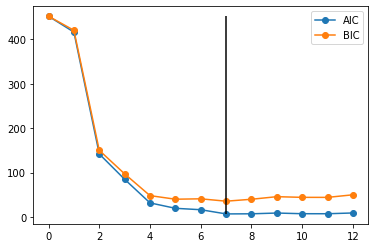

In [36]:
plt.plot(aic_criterion, marker='o', label='AIC')
plt.plot(bic_criterion, marker='o', label='BIC')
plt.legend()
plt.vlines(index_alpha_path_aic, aic_criterion.min(), aic_criterion.max(), colors='k');

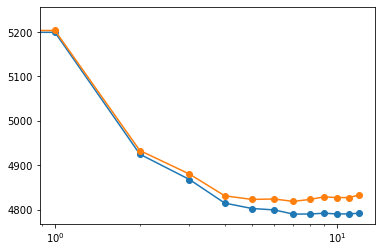

In [46]:
plt.semilogx(pipe_aic[-1].criterion_ ,label='AIC', marker='o');
plt.semilogx(pipe_bic[-1].criterion_ ,label='BIC', marker='o');